# Classificação

As tarefas baseadas em classificação são um subcampo em Aprendizado de Máquina supervisionado, onde o objetivo principal é
prever rótulos de saída ou respostas de natureza categórica para dados de entrada.

## Fases
O processo de classificação basicamente é composto pelas seguintes fases:

1. Obtenção de dados(dataset) 
2. Criação e Treinamento de Modelo
3. Predição de classes
4. Teste de Desempenho

## 1. Obtenção dos dados
Pode-se obter um diversidade infinita de dados e de diversas fontes, tais como:

1.   sites de orgãos públicos(https://dados.gov.br/)
2.   plataformas online(www.kaggle.com)
3.   datasets de bibliotecas de linguagem de programação(sklearn.datasets do python)
4.   pesquisa própria

## Exemplo: Pera ou Maçã?
Imaginemos que um produtor de peras e maçãs nos pediu um software que baseado no diâmetro de uma fruta e de sua cor defina se essa fruta é uma pera ou um maçã.

Desse modo o conjunto de dados que esse produtor nos forneceria seria algo parecido com isso:

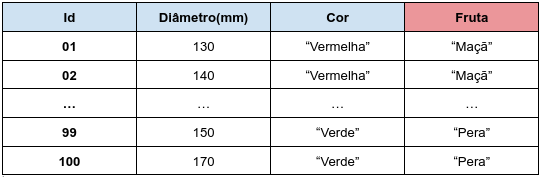

Com os dados em mãos, nós dividiriamos esse dados em Dados de Treinamento e Dados de Teste. 

1.   Dados de Treinamento: são dados que serão utilizados para a criação do modelo e permitirá a obtenção dos padrões entre os atributos e as classes.
2.   Dados de Teste: são dados que serão utilizados para medir o desempenho de predição do modelo, são dados que conheçemos as classes, mas que apresentamos ao modelo somente os atributos e deixamos que ele realize a classificação, em seguida é só comparar o quanto ele acertou.

Então vamos fazer o seguinte, dos dados que nos foram entregues:

Treinamento:

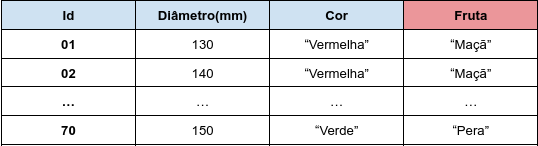

Teste:

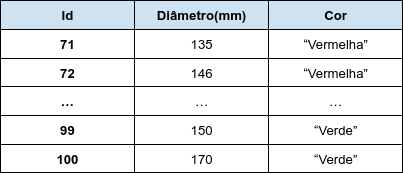

##2. Criação e Treinamento de Modelo
A Criação e Treinamento do Modelo consiste básicamente na aplicação dos dados de treinamento em algum agoritmo de classificação, temos varios algóritmos conhecidos de classificação, dentre os quais cabe destacar:

*   Árvore de Decisão
*   Classificadores Bayesianos
*   Redes Bayesianas
*   K-vizinhos mais próximos

Se aplicarmos os nossos dados relacionados a frutas, por exemplo em uma algoritmo de Árvore de decisão, após a aplicação teremos um algoritmo treinado e em teoria capaz de prever se uma fruta é Maçã ou Pera.


## 3. Predição de classes
Com o modelo treinado, podemos agora aplicarmos os nossos dados de teste e obtermos um sequência de classificações, suponhamos que seja esse o resultado:

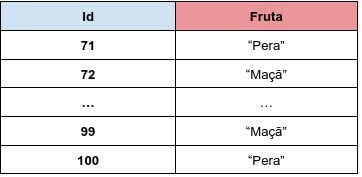

Algumas previsões aparentemente estão erradas, é o que podemos ver comparando com o resultado que tinhamos guardado e que esperavamos:

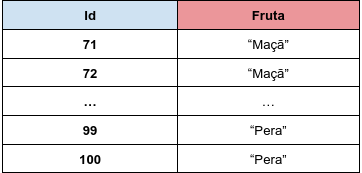

## 4. Teste de Desempenho
Como vimos na seção anterior nosso modelo não acertou todas as classificações das frutas, por conta disso é de grande importância realizar testes de desepenho no nosso modelo.

Com o teste de desempenho podemos verificar a taxa de acertos de um modelo e saber se é necessário adicionar mais dados de treinamento.

Ademais é possivel verificar se um modelo é mais preciso do que outro com a utilização de métricas de treinamento.

Um teste simples como vimos seria dividir a quantidade de acertos do modelo pelo total de casos de teste, tal cálculo é conhecido como Acurácia.

Mas existem varias outras métricas que podem ser utilizadas, dependendo do contexto, do algoritmo e da necessidade do usuário.

## 5. Referências

[1] Data Mining Concepts and Techniques - Han & Kamber. 3rd Ed.

[4] Practical Machine Learning with Python. Sarkar, Bali & Sharma

## 6. Exemplo de aplicação
Aplicação feita utilizando como classificador uma **Árvore de Decisão**, como métrica de desempenho a **acurácia** e um dataset conhecido por: **Conjunto de dados flor Iris**


In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pickle

flores = load_iris()

# casos que serao retirados
ind_ret = [0,10,20,30,40,50,60,70,80,90,100]

#casos de treinamento
train_target = np.delete(flores.target, ind_ret)
train_data = np.delete(flores.data, ind_ret, axis=0)

#casos de teste
test_target = flores.target[ind_ret]
test_data = flores.data[ind_ret]

# criacao de classificador e seu treinamento com os dados

clas = tree.DecisionTreeClassifier()

clas = clas.fit(train_data, train_target)

# serialização de modelo treinado em arquivo
arq = open('arq.pkl','wb')
pickle.dump(clas,arq)
arq.close()

# importacao de arquivo serial contendo modelo
fil = open('arq.pkl','rb')
clas02 = pickle.load(fil)
fil.close()

# modelo prevendo o tipo de flor
previsao = clas02.predict(test_data)

# resultados
print("Previsto")
print(previsao)

print()

print("Real")
print(test_target)

print()

# Teste de Desempenho
print("Acuracia: %.2f" %accuracy_score(test_target, previsao))

Previsto
[0 0 0 0 0 1 1 2 1 1 2]

Real
[0 0 0 0 0 1 1 1 1 1 2]

Acuracia: 0.91
